In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import nltk
nltk.download('all')
!pip install pyLDAvis

In [0]:
import pandas as pd
import numpy as np
import string
import re
from pprint import pprint
# NLTK 
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = stopwords.words('english') #this depends on each language
# Gensim
!pip install gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# spacy for lemmatization
import spacy
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [0]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/all_data.csv')
#Drop all products with missing product name
df.dropna(subset=['product_name'],inplace=True)
a = df[['product_id','product_name','pre_define_cat']]

In [0]:
a

**FastText Embeddings**

In [0]:
%tensorflow_version 1.x

In [0]:
from keras.preprocessing.text import Tokenizer
from gensim.models.fasttext import FastText
import numpy as np
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer
import re

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
custom_spec_list = ['Specifications','Processor Type','Hard Drive Capacity','Condition','Product Dimensions (L x W x H)','Processor Speed','Manufacturer Part Number','Wireless Technology','RAM Memory','Maximum RAM Supported'
,'Operating System','Model','Screen Size','Brand',' Inches','Supported Media Format','See Description']

def preprocess(pdf):
  custom_spec_list = ['Specifications','Processor Type','Hard Drive Capacity','Condition','Product Dimensions (L x W x H)','Processor Speed','Manufacturer Part Number','Wireless Technology','RAM Memory','Maximum RAM Supported'
  ,'Operating System','Model','Screen Size','Brand',' Inches','Supported Media Format','See Description']
  for i in custom_spec_list:
    pdf=str(pdf).lstrip().rstrip().replace(i,' ')
  return pdf

def corpus_create(corpus,p):
  for i in p:
    corpus.append(i)

In [0]:
final = df[['pre_define_cat','product_name','product_ati','product_specs']]
final.head()

,pre_define_cat,product_name,product_ati,product_specs
0,desktop,Refurbished Lenovo THINKCENTRE M92P-SFF Deskto...,Do as much as you like with this Lenovo THINKC...,SpecificationsBrandLenovoOperating SystemWindo...
1,desktop,Refurbished Dell Optiplex 790-SFF WA1-0309 Des...,Certified Refurbished Items: \n \n What to Ex...,SpecificationsBrandDellOperating SystemWindows...
2,desktop,HP 8200 Elite Desktop Computer with Windows 10...,This HP desktop computer is very fast and depe...,SpecificationsBrandHPOperating SystemWindows 1...
3,desktop,"Apple iMac 21.5"" 2.7GHz Core i5 (ME086LL/A) Al...","The iMac ""Core i5"" 2.7 21.5-Inch Aluminum (Lat...",SpecificationsBrandAppleOperating SystemMac OS...
4,desktop,Refurbished - Dell Optiplex Desktop Computer 3...,Refurbished - Dell Optiplex Desktop Computer 3...,SpecificationsBrandDellOperating SystemWindows...


In [0]:
final['cleaned_specs']= final['product_specs']
final['cleaned_specs'] = final['cleaned_specs'].apply(preprocess)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
final

,pre_define_cat,product_name,product_ati,product_specs,cleaned_specs
0,desktop,Refurbished Lenovo THINKCENTRE M92P-SFF Deskto...,Do as much as you like with this Lenovo THINKC...,SpecificationsBrandLenovoOperating SystemWindo...,Lenovo Windows 10 4 GB M92P Intel Core i5-3470...
1,desktop,Refurbished Dell Optiplex 790-SFF WA1-0309 Des...,Certified Refurbished Items: \n \n What to Ex...,SpecificationsBrandDellOperating SystemWindows...,Dell Windows 10 8 GB 790 Intel Core i5-2500 Pr...
2,desktop,HP 8200 Elite Desktop Computer with Windows 10...,This HP desktop computer is very fast and depe...,SpecificationsBrandHPOperating SystemWindows 1...,HP Windows 10 4.00 GB 8200 Elite Intel Quad Co...
3,desktop,"Apple iMac 21.5"" 2.7GHz Core i5 (ME086LL/A) Al...","The iMac ""Core i5"" 2.7 21.5-Inch Aluminum (Lat...",SpecificationsBrandAppleOperating SystemMac OS...,"Apple Mac OS 10.12 Sierra, Mac OS 8 GB ME086LL..."
4,desktop,Refurbished - Dell Optiplex Desktop Computer 3...,Refurbished - Dell Optiplex Desktop Computer 3...,SpecificationsBrandDellOperating SystemWindows...,Dell Windows 10 4.00 GB K_00180 Intel Core 2 D...
...,...,...,...,...,...
13886,tv,"VIZIO SmartCast E-Series E55u-D2 55"" 4K Ultra ...",Coverage for product breakdowns and malfunctio...,"Screen Size5\""Is SmartYBrandVIZIOConditionNewR...","5\""Is SmartY VIZIO NewRefresh Rate120 Hz"
13887,tv,"Samsung UN75RU8000 75"" RU8000 LED Smart 4K UHD...","E3SAMUN75RU8000 \n \n Samsung RU8000 75"" Cl...",Display TechnologyLEDResolution4K (2160P)Scree...,"Display TechnologyLEDResolution4K (2160P) 5\"",..."
13888,tv,DummyStressTest1294Automation generated BV title,NaN,NaN,nan
13889,tv,LED TV USB Backlight Kit Computer RGB LED Ligh...,Product Description FEATURES: \nCreate special...,BrandMascarryFeaturesLED TV USB Backlight Kit ...,MascarryFeaturesLED TV USB Backlight Kit 3.3ft


In [0]:
stemmer = WordNetLemmatizer()

def preprocess_text(document):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(document))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        tokens = document.split()
        tokens = [stemmer.lemmatize(word) for word in tokens]
        tokens = [word for word in tokens if word not in en_stop]
        #tokens = [word for word in tokens if len(word) > 3]

        preprocessed_text = ' '.join(tokens)

        return preprocessed_text

In [0]:
product_name = final['product_name']
#converting the series to list
product_spec_ls = product_name.tolist()

In [0]:
final_corpus = [preprocess_text(sentence) for sentence in product_spec_ls if sentence.strip() !='']

word_tokenized_corpus = [sent.split(' ') for sent in final_corpus]

In [0]:
len(word_tokenized_corpus)

12896

In [0]:
embedding_size = 512
window_size = 10
min_word = 1
down_sampling = 1e-2

In [0]:
%%time
ft_model = FastText(word_tokenized_corpus,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1,
                      iter=100)

CPU times: user 17min 7s, sys: 5.68 s, total: 17min 13s
Wall time: 8min 51s


In [0]:
sent = final_corpus[0].split(' ')
a = [np.zeros(512)]
for words in sent:
  v = ft_model.wv[words]
  a = np.concatenate((a, [v]), axis=0)

In [0]:
a.sum(axis = 0)/len(sent)

In [0]:
b = [np.zeros(512)]
for sent in final_corpus:
  sent = sent.split(' ')
  a = [np.zeros(512)]
  for words in sent:
    try:
      v = ft_model.wv[words]
    except:
      #print(words)
      continue
    a = np.concatenate((a, [v]), axis=0)
  sentvec = a.sum(axis = 0)/len(sent)
  b = np.concatenate((b, [sentvec]), axis=0)

In [0]:
b = b[1:]

In [0]:
all_data_fastext = pd.DataFrame(b)

In [0]:
all_data_fastext

In [0]:
all_data_fastext_np = all_data_fastext.to_numpy()

In [0]:
df1 = pd.DataFrame(all_data_fastext_np)

In [0]:
df1

In [0]:
#Drop all products with missing product ati

df1['product_name'] = df['product_name']
df1['type'] = df['pre_define_cat']
df.dropna(subset=['product_name'],inplace=True)

In [0]:
df1

In [0]:
#df1['type']= df['pre_define_cat']
df_desktop = df1[df1['type']== 'desktop']
df_desktop_1 = df_desktop.loc[:,df_desktop.columns != 'type']

In [0]:
df_desktop_1.shape

(993, 513)

**PCA**

In [0]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  
sc = StandardScaler() 

def PCArun(df,testdata,x):
  # Creating train and test set
  #X_train, X_test, y_train, y_test = train_test_split(df, testdata, test_size = 0.0, random_state = 0) 
  X_train = df
  #Fitting model  
  X_train = sc.fit_transform(X_train) 
  #X_test = sc.transform(X_test) 

  # Applying PCA function on training for 80% variance 
  pca = PCA(x) 
  
  X_train = pca.fit_transform(X_train) 
  #X_test = pca.transform(X_test)  
  explained_variance = pca.explained_variance_ratio_ 
  #return X_train, X_test,y_train,y_test,explained_variance
  return X_train,explained_variance


In [0]:
X_train, explained_variance = PCArun(df_desktop_1.loc[:,df_desktop_1.columns != 'product_name'],df_desktop['type'],0.7)
X_train.shape

(993, 19)

In [0]:
X_train

array([[ -7.52481276,  -7.00296196,   4.27454041, ...,  -1.38589923,
          3.71745035,   2.93409295],
       [-10.27753426,  -8.39322077,   3.08216743, ...,   0.39118452,
         -1.43083505,   1.30915669],
       [ -1.58948495,   3.02439781,  -3.68903044, ...,  -0.92662031,
          0.89704835,   0.38962094],
       ...,
       [ -5.39338294,   4.97488509,  -2.07625525, ...,  -0.2568034 ,
          0.57230949,   1.1373229 ],
       [  0.06706203,   3.28551199,  -4.30393053, ...,   3.97629694,
          1.11638665,   0.42689224],
       [ 16.1160878 ,  -8.91999843,  -2.52816701, ...,  -1.41428444,
          2.69494109,   2.22562503]])

**K-MEANS**

In [0]:
#Import libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

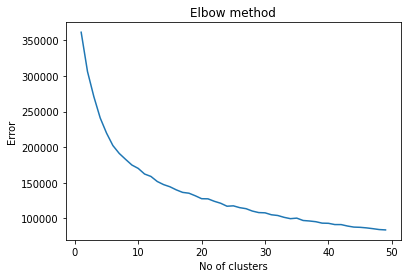

In [0]:
Error =[]
for i in range(1, 50):
    kmeans = KMeans(n_clusters = i).fit(X_train)
    kmeans.fit(X_train)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 50), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

**10 number of clusters seems like a good option**

In [0]:
kmeans15 = KMeans(n_clusters=10)
y_kmeans15 = kmeans15.fit_predict(X_train)
print(y_kmeans15)
kmeans15.cluster_centers_

In [0]:
from sklearn import metrics
metrics.silhouette_score(X_train,y_kmeans15)

0.26440597913773867

In [0]:
data1 = pd.DataFrame(X_train).iloc[:,0:2]
data1['label']=y_kmeans15
data1.columns= ['P1','P2','label']

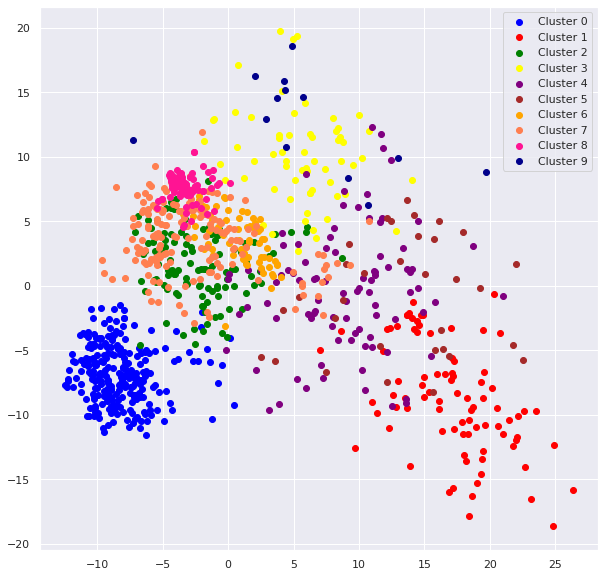

In [0]:
import matplotlib
cmap={0:'blue',1:'red',2:'green',3:'yellow',4:'purple',5:'brown',6:'orange',7:'coral',8:'deeppink',9:'darkblue',10:'tan',11:'plum',12:'tan',13:'teal',14:'salmon'}

fig, ax = plt.subplots()
for l in range(len(data1.loc[:,'label'].unique())):
  pca_temp = data1[data1['label']==l]
  ax.scatter(pca_temp['P1'], pca_temp['P2'], c=cmap[l], label= 'Cluster '+str(l))
ax.legend()
fig.set_size_inches(10,10)

In [0]:
a[a['pre_define_cat']== 'desktop']
after_kmeans = pd.DataFrame(a[a['pre_define_cat']== 'desktop'])
y_kmeans15.shape
after_kmeans.shape
after_kmeans['k_val']= y_kmeans15

In [0]:
after_kmeans

,product_id,product_name,pre_define_cat,k_val
0,Model: M92P,Refurbished Lenovo THINKCENTRE M92P-SFF Deskto...,desktop,5
1,Model: 790,Refurbished Dell Optiplex 790-SFF WA1-0309 Des...,desktop,0
2,Model: 8200 Elite,HP 8200 Elite Desktop Computer with Windows 10...,desktop,3
3,Model: ME086LL/A,"Apple iMac 21.5"" 2.7GHz Core i5 (ME086LL/A) Al...",desktop,12
4,Model: K_00180,Refurbished - Dell Optiplex Desktop Computer 3...,desktop,2
...,...,...,...,...
988,Model: 745/755/760/780/360/380,Dell Optiplex Desktop Computer Intel Core 2 Du...,desktop,3
989,Model: Optiplex 755,Dell Optiplex 755 Core 2 Duo 3.0Ghz 4Gb 500Gb ...,desktop,3
990,"Model: 745, 755, 760",Dell Optiplex Desktop PC Tower Bundle Windows ...,desktop,3
991,Model: 8200,"HP 8200 Elite Desktop Computer, Intel Core I5 ...",desktop,10


**Sorting according to cluster value**

In [0]:
after_kmeans.sort_values(by=['k_val'],inplace=True)
set(y_kmeans15)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}

**LDA**

In [0]:
def ldafunc(data):
  def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

  data_words = list(sent_to_words(data))

  #print(data_words[:1])
  # Build the bigram and trigram models
  bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
  trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

  # Faster way to get a sentence clubbed as a trigram/bigram
  bigram_mod = gensim.models.phrases.Phraser(bigram)
  trigram_mod = gensim.models.phrases.Phraser(trigram)

  # See trigram example
  #print(trigram_mod[bigram_mod[data_words[0]]])
  # Define functions for stopwords, bigrams, trigrams and lemmatization
  def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

  def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

  def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

  def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out 
  #To run this code it is necessary to get the spacy moidel: "!python - m spacy download en", last depends on the used language 

  # Remove Stop Words
  data_words_nostops = remove_stopwords(data_words)

  # Form Bigrams
  data_words_bigrams = make_bigrams(data_words_nostops)

  # Initialize spacy 'es' model, keeping only tagger component (for efficiency)
  #python3 -m spacy download es
  nlp = spacy.load('en', disable=['parser', 'ner'])

  # Do lemmatization keeping only noun, adj, vb, adv
  data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

  # Create Dictionary
  id2word = corpora.Dictionary(data_lemmatized)

  # Create Corpus
  texts = data_lemmatized

  # Term Document Frequency
  corpus = [id2word.doc2bow(text) for text in texts]

  # View
  #print(corpus[:1])
  # Human readable format of corpus (term-frequency)
  [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:2]]

  # Build LDA model
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=2, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=14,
                                           alpha='auto',
                                           per_word_topics=True)

  # Print the Keyword in the 2 topics
  #pprint(lda_model.print_topics())
  doc_lda = lda_model[corpus]

  # Compute Perplexity
  #print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  #print('\nCoherence Score: ', coherence_lda)

  # Visualize the topics
  pyLDAvis.enable_notebook()
  vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
  vis

  return lda_model.print_topics()

In [0]:
cluster_results = {}
for i in range(len(set(y_kmeans15))):
  print(i)
  x1 = after_kmeans['product_name'][after_kmeans['k_val']==i].tolist()
  ans = ldafunc(x1)
  num = 'cluster'+str(i)
  cluster_results[num] = ans

0


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


1


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


2


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


3


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


4


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


5


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


6


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


7


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


8


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


9


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


10


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


11


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


12


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


13


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


14


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [0]:
cluster_results

{'cluster0': [(0,
   '0.114*"memory" + 0.110*"core" + 0.103*"include" + 0.098*"monitor" + 0.092*"refurbish" + 0.088*"drive" + 0.084*"window" + 0.073*"pro" + 0.066*"desktop" + 0.061*"pc"'),
  (1,
   '0.118*"drive" + 0.118*"refurbish" + 0.113*"monitor" + 0.110*"window" + 0.100*"pro" + 0.097*"memory" + 0.097*"include" + 0.047*"desktop" + 0.034*"core" + 0.034*"hard"')],
 'cluster1': [(0,
   '0.105*"core" + 0.100*"refurbish" + 0.089*"bit" + 0.060*"dual" + 0.056*"small" + 0.053*"home" + 0.051*"pc" + 0.047*"form" + 0.046*"window" + 0.043*"factor"'),
  (1,
   '0.185*"pro" + 0.147*"win" + 0.096*"refurbish" + 0.060*"wty" + 0.049*"yr" + 0.028*"service" + 0.024*"home" + 0.021*"certify" + 0.021*"window" + 0.017*"monitor"')],
 'cluster10': [(0,
   '0.210*"include" + 0.155*"bluetooth" + 0.126*"keyboard" + 0.111*"mouse" + 0.097*"home" + 0.077*"wifi" + 0.070*"lcd" + 0.060*"professional" + 0.032*"monitor" + 0.015*"pro"'),
  (1,
   '0.104*"pc" + 0.075*"drive" + 0.075*"computer" + 0.075*"refurbish" + 0.07

**GMM Modeling**

In [0]:
import numpy as np
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Best number of cluster according to BIC**

Text(0.5, 0, 'n_components')

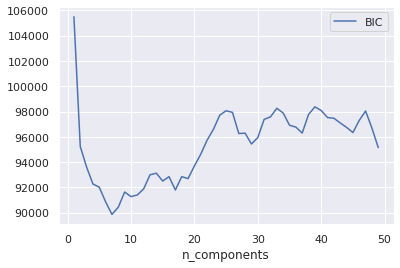

In [0]:
n_components = np.arange(1, 50)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_train) for n in n_components]

# BIC Scores 
plt.plot(n_components, [m.bic(X_train) for m in models], label='BIC')
#plt.plot(n_components, [m.aic(X_train) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

**BIC Best number of clusters = 7**

**According to Silhouette Score**

In [0]:
sil_score = []
for i in range(2,50):
  gmm = GaussianMixture(n_components=i)
  gmm.fit(X_train)
  labels = gmm.predict(X_train)
  sil_score.append(metrics.silhouette_score(X_train,labels))

sil_score_1 = pd.DataFrame(range(2,50,1))

In [0]:
sil_score_1['Silhouette Score']= sil_score

In [0]:
sil_score_1.columns = ['Clusters','Silhouette Score']

In [0]:
sil_score_1.sort_values(by='Silhouette Score',ascending=False)

,Clusters,Silhouette Score
10,12,0.251260
36,38,0.246672
32,34,0.242119
45,47,0.239141
28,30,0.237724
21,23,0.237086
17,19,0.235822
15,17,0.232981
42,44,0.231953
37,39,0.228838


**Number of clusters here is 12**


**Comparable to Silhouette Score**

In [0]:
gmm = GaussianMixture(n_components=12)
gmm.fit(X_train)
labels = gmm.predict(X_train)
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

In [0]:
data = pd.DataFrame(X_train).iloc[:,0:2]
data['label']=labels
data.columns= ['P1','P2','label']

In [0]:
df_desktop

In [0]:
after_gmm = pd.DataFrame(df_desktop[df_desktop['type']== 'desktop'])
after_gmm['cluster'] = labels

In [0]:
cluster_gmm_results = {}
for i in range(len(set(labels))):
  print(i)
  x1 = after_gmm['product_name'][after_gmm['cluster']==i].tolist()
  ans = ldafunc(x1)
  num = 'cluster'+str(i)
  cluster_gmm_results[num] = ans

In [0]:
X_train.shape

(993, 19)

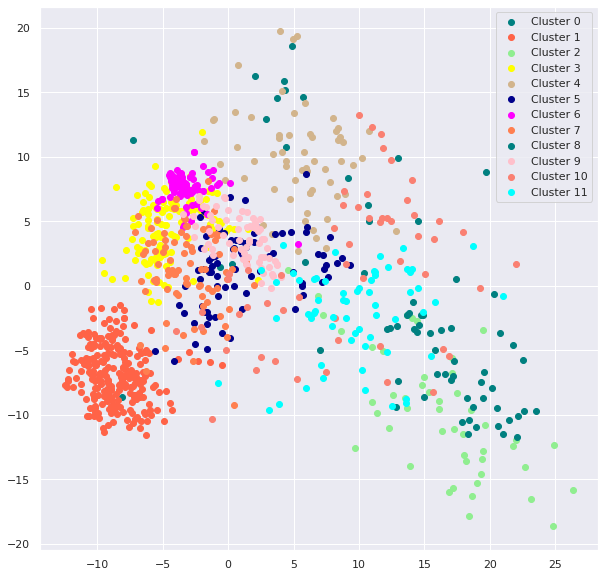

In [0]:
import matplotlib

cmap={0:'teal',1:'tomato',2:'lightgreen',3:'yellow',4:'tan',5:'darkblue',6:'magenta',7:'coral',8:'teal',9:'pink',10:'salmon',11:'aqua',}

fig, ax = plt.subplots()
for l in range(len(data.loc[:,'label'].unique())):
  pca_temp = data[data['label']==l]
  ax.scatter(pca_temp['P1'], pca_temp['P2'], c=cmap[l], label= 'Cluster '+str(l))
ax.legend()
fig.set_size_inches(10,10)

In [0]:
cluster_gmm_results

{'cluster0': [(0,
   '0.163*"pc" + 0.129*"hard" + 0.097*"computer" + 0.079*"lcd" + 0.071*"drive" + 0.068*"desktop" + 0.061*"refurbish" + 0.039*"system" + 0.030*"tower" + 0.024*"window"'),
  (1,
   '0.191*"refurbish" + 0.096*"core" + 0.087*"computer" + 0.061*"dual" + 0.051*"keyboard" + 0.051*"monitor" + 0.048*"window" + 0.047*"mouse" + 0.043*"bundle" + 0.035*"year"')],
 'cluster1': [(0,
   '0.183*"refurbish" + 0.161*"usb" + 0.149*"dual" + 0.127*"window" + 0.125*"mouse" + 0.074*"monitor" + 0.057*"keyboard" + 0.054*"pc" + 0.040*"core" + 0.008*"display"'),
  (1,
   '0.208*"core" + 0.206*"pc" + 0.195*"keyboard" + 0.157*"monitor" + 0.098*"home" + 0.057*"office" + 0.054*"usb" + 0.008*"refurbish" + 0.005*"vga" + 0.004*"dual"')],
 'cluster2': [(0,
   '0.137*"refurbish" + 0.067*"core" + 0.058*"certify" + 0.050*"silver" + 0.044*"warranty" + 0.039*"pc" + 0.037*"year" + 0.030*"dent" + 0.030*"scratch" + 0.024*"wlan"'),
  (1,
   '0.185*"refurbish" + 0.095*"desktop" + 0.086*"computer" + 0.060*"apple" 